In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#input
def get_dataset(title, ts_name=None):
    ts_id = None
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    if ts_name is not None:
        ts_id = dataset.timeseries_set.all().filter(name=ts_name).first().id

    return dataset, training_dataset, ts_id

In [3]:
def lisa_pearson_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    %timeit lisa_pearson(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size)

In [4]:
def lisa_dtw_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    %timeit lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function='euclidean')

In [5]:
def lisa_geo_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score'):
    %timeit lisa_geo(df, df_class, time_series_id, maximize_score=maximize_score)

In [6]:
def rpca_detection_time_it(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    %timeit robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [7]:
def histogram_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    %timeit histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [8]:
def cluster_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    %timeit cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [9]:
def svm_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    %timeit svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [10]:
def isolation_forest_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    %timeit isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [11]:
# Temp1 - TS NUMBER
dataset_names = ['Idaweb Swiss Temperature TS2', 
                 'Idaweb Swiss Temperature TS4', 
                 'Idaweb Swiss Temperature TS6', 
                 'Idaweb Swiss Temperature TS8',
                 'Idaweb Swiss Temperature TS10',
                 'Idaweb Swiss Temperature TS12',
                 'Idaweb Swiss Temperature TS14'
                ]
ts_name = 'REH'

In [12]:
# TIME TS NUMBER - Pearson
for dataset_name in dataset_names:
    dataset, _, ts_id = get_dataset(dataset_name, ts_name)
    lisa_pearson_detection_time_it(dataset.dataframe, dataset.dataframe_class, ts_id)

2.62 s ± 86.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.59 s ± 1.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.71 s ± 67.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.79 s ± 63.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.65 s ± 999 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.66 s ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.8 s ± 57.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
# TIME TS NUMBER - DTW
for dataset_name in dataset_names:
    dataset, _, ts_id = get_dataset(dataset_name, ts_name)
    lisa_dtw_detection_time_it(dataset.dataframe, dataset.dataframe_class, ts_id)

3.88 s ± 86.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.48 s ± 165 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.62 s ± 178 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.84 s ± 186 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.16 s ± 83.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.4 s ± 293 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.1 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
# TIME TS NUMBER - LISA VANILLA
for dataset_name in dataset_names:
    dataset, _, ts_id = get_dataset(dataset_name, ts_name)
    lisa_geo_detection_time_it(dataset.dataframe, dataset.dataframe_class, ts_id)

2.69 s ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.72 s ± 48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.81 s ± 39.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.88 s ± 37.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.98 s ± 39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.08 s ± 66.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.21 s ± 40.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
# TIME TS NUMBER - RPCA
for dataset_name in dataset_names:
    dataset, training_dataset, _ = get_dataset(dataset_name)
    rpca_detection_time_it(dataset.dataframe, dataset.dataframe_class, training_dataset.dataframe, training_dataset.dataframe_class)

2.64 s ± 32.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.68 s ± 45.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.66 s ± 86.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.73 s ± 46.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.63 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.84 s ± 107 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.86 s ± 98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
# TIME TS NUMBER - HISTOGRAM
for dataset_name in dataset_names:
    dataset, training_dataset, _ = get_dataset(dataset_name)
    histogram_detection_time_it(dataset.dataframe, dataset.dataframe_class, training_dataset.dataframe, training_dataset.dataframe_class)

2.64 s ± 43.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.66 s ± 37.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.62 s ± 49.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.68 s ± 52.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.77 s ± 68.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.86 s ± 55.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.79 s ± 64.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
# TIME TS NUMBER - CLUSTER
for dataset_name in dataset_names:
    dataset, training_dataset, _ = get_dataset(dataset_name)
    cluster_detection_time_it(dataset.dataframe, dataset.dataframe_class, training_dataset.dataframe, training_dataset.dataframe_class)

2.64 s ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.76 s ± 32.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.65 s ± 60.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.71 s ± 58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.73 s ± 62.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.9 s ± 86.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.9 s ± 81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
# TIME TS NUMBER - SVM
for dataset_name in dataset_names:
    dataset, training_dataset, _ = get_dataset(dataset_name)
    svm_detection_time_it(dataset.dataframe, dataset.dataframe_class, training_dataset.dataframe, training_dataset.dataframe_class)

2.55 s ± 66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.63 s ± 47.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.66 s ± 52.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.72 s ± 71.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.73 s ± 42.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.72 s ± 61.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.83 s ± 28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
# TIME TS NUMBER - ISOLATION FOREST
for dataset_name in dataset_names:
    dataset, training_dataset, _ = get_dataset(dataset_name)
    isolation_forest_detection_time_it(dataset.dataframe, dataset.dataframe_class, training_dataset.dataframe, training_dataset.dataframe_class)

2.9 s ± 35.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.88 s ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.9 s ± 43.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.9 s ± 56.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3 s ± 20.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.03 s ± 53.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.09 s ± 31.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
dimension = np.array([2, 4, 6, 8, 10, 12, 14])

lisa_pearson_results = np.array([2.62, 2.59, 2.71, 2.79, 2.65, 2.66, 2.8])
lisa_dtw_results = np.array([3.88, 5.48, 6.62, 7.84, 9.16, 10.4, 12.1])
lisa_spatial_results = np.array([2.69, 2.72, 2.81, 2.88, 2.98, 3.08, 3.21])
rpca_results = np.array([2.64, 2.68, 2.66, 2.73, 2.63, 2.84, 2.86])
histogram_results = np.array([2.64, 2.66, 2.62, 2.68, 2.77, 2.86, 2.79])
cluster_results = np.array([2.64, 2.76, 2.65, 2.71, 2.73, 2.9, 2.9])
svm_results = np.array([2.55, 2.63, 2.66, 2.72, 2.73, 2.72, 2.83])
isolation_results = np.array([2.9, 2.88, 2.9, 2.9, 3, 3.03, 3.09])

scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [3]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Number of TS')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

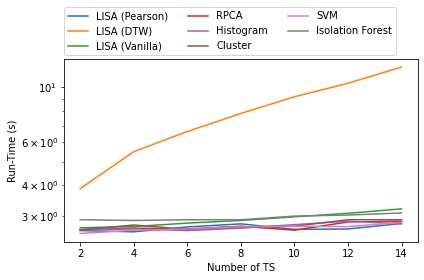

In [4]:
#PLOT
generate_timeit_line_chart(dimension, scores)
